## Machine Learning Tutorial Python - 8 Logistic Regression (Multiclass Classification)

non-binary


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # handwritten digits

In [114]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]  # 8x8 img as a 1D array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

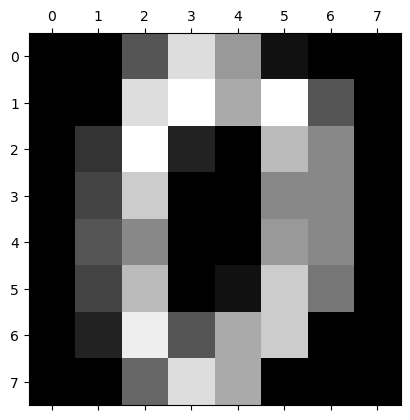

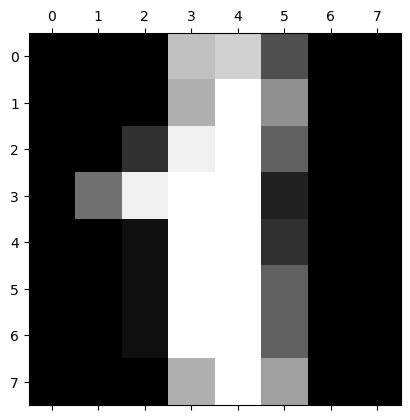

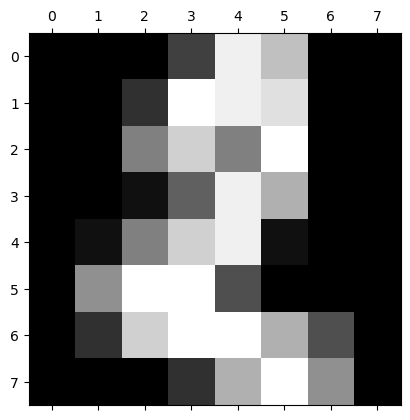

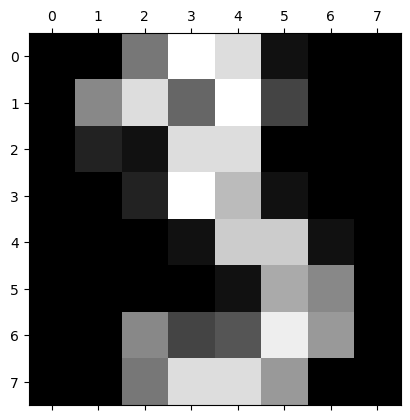

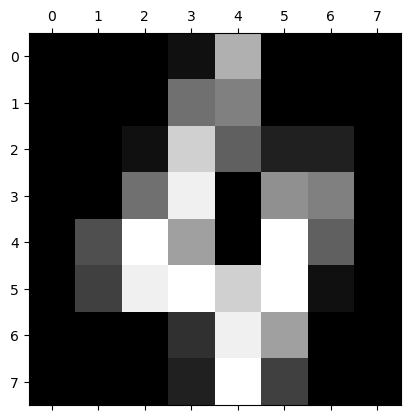

In [116]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [ ]:
digits.target[0:5]  # what the img actually is (training set)

array([0, 1, 2, 3, 4])

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2
)  # split to avoid bias (error)
len(X_train) / len(digits.data)

0.7996661101836394

In [119]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [120]:
log_reg.score(X_test, y_test)

0.9611111111111111

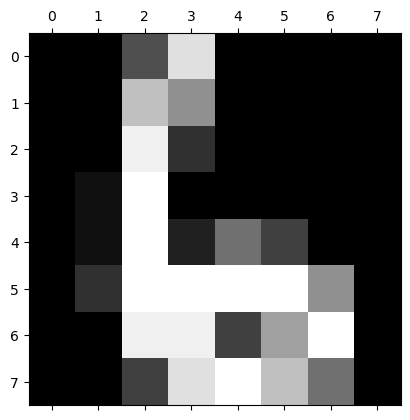

In [ ]:
plt.matshow(digits.images[67])  # rand

In [122]:
digits.target[67]

6

In [ ]:
log_reg.predict([digits.data[67]])  # cool

array([6])

In [ ]:
log_reg.predict(digits.data[0:5])  # like above

array([0, 1, 2, 3, 4])

In [125]:
# where fail?
from sklearn.metrics import confusion_matrix

y_predicted = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 38,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  0,  1,  1,  1,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 30]])

Text(95.72222222222221, 0.5, 'Truth')

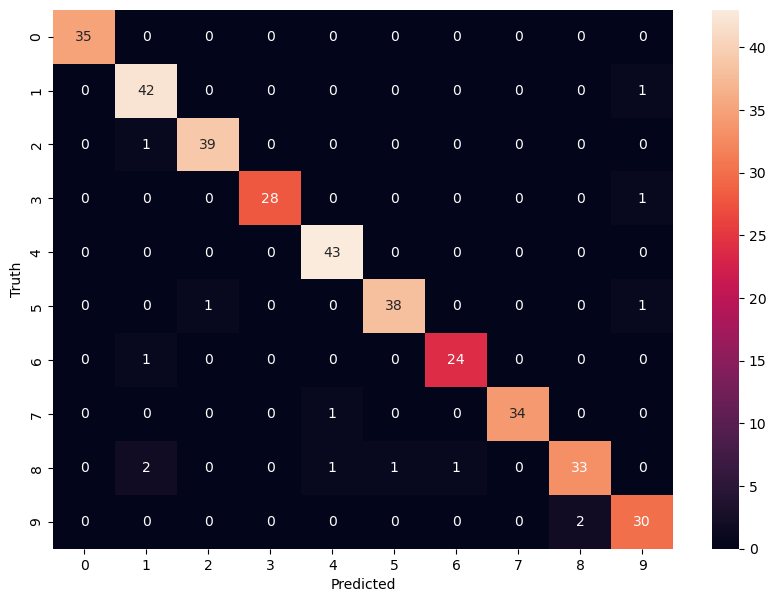

In [ ]:
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")